# Load datasets, drop uneeded columns

In [15]:
import pandas as pd
import numpy as np

DATASET_PATH="/Users/eno/Datasets/"

# load the data
df_03_2020 = pd.read_csv(f'{DATASET_PATH}/flightlist_20200401_20200430.csv')
df_10_2022 = pd.read_csv(f'{DATASET_PATH}/flightlist_20221001_20221031.csv')

#drop the columns we dont want anymore, and remove the NaN values from the relevant ones
df_20_cleaned = df_03_2020.drop(columns=["registration", "latitude_1", "longitude_1", "longitude_2", "latitude_2", "altitude_1", "altitude_2", "firstseen", "lastseen"])
df_22_cleaned = df_10_2022.drop(columns=["registration", "latitude_1", "longitude_1", "longitude_2", "latitude_2", "altitude_1", "altitude_2", "firstseen", "lastseen"])
df_20_cleaned = df_20_cleaned.dropna(subset=["origin", "destination", "day"])
df_22_cleaned = df_22_cleaned.dropna(subset=["origin", "destination", "day"])




# Filter just for air traffic to, from, or within the United States

In [17]:

#filter the resulting dataframes for only air traffic to, from, or within the United States
df_20_cleaned = df_20_cleaned[(df_20_cleaned["origin"].str.startswith("K")) | (df_20_cleaned["destination"].str.startswith("K"))]
df_22_cleaned = df_22_cleaned[(df_22_cleaned["origin"].str.startswith("K")) | (df_22_cleaned["destination"].str.startswith("K"))]



# Filter just for the 10 busiest airports in the country

In [42]:
airport_codes = ["KATL", "KDFW", "KDEN", "KORD", "KLAX", "KCLT", "KLAS", "KPHX", "KMIA"]

# create an empty dictionary to store the counts, as well as a dictionary to store the percentages
airport_counts_20 = {}
airport_counts_22 = {}
change_dict = {}

for airport in airport_codes:
    count_2020 = ((df_20_cleaned["origin"] == airport) | (df_20_cleaned["destination"] == airport)).sum()
    count_2022 = ((df_22_cleaned["origin"] == airport) | (df_22_cleaned["destination"] == airport)).sum()
    airport_counts_20[airport] = count_2020
    airport_counts_22[airport] = count_2022

for airport in airport_codes:
    change = airport_counts_22[airport] - airport_counts_20[airport]
    pct_change = (change / airport_counts_20[airport]) * 100
    change_dict[airport] = float("{:.2f}".format(pct_change))
    print(f'In March 2020 {airport} recorded {airport_counts_20[airport]} flights. In October 2022 it recorded {airport_counts_22[airport]}. This indicates a {pct_change:.2f}% change between 2020 and 2022')


In March 2020 KATL recorded 14399 flights. In October 2022 it recorded 48764. This indicates a 238.66% change between 2020 and 2022
In March 2020 KDFW recorded 15073 flights. In October 2022 it recorded 39901. This indicates a 164.72% change between 2020 and 2022
In March 2020 KDEN recorded 9531 flights. In October 2022 it recorded 41468. This indicates a 335.09% change between 2020 and 2022
In March 2020 KORD recorded 18908 flights. In October 2022 it recorded 50070. This indicates a 164.81% change between 2020 and 2022
In March 2020 KLAX recorded 12385 flights. In October 2022 it recorded 34495. This indicates a 178.52% change between 2020 and 2022
In March 2020 KCLT recorded 9204 flights. In October 2022 it recorded 21803. This indicates a 136.89% change between 2020 and 2022
In March 2020 KLAS recorded 8012 flights. In October 2022 it recorded 40896. This indicates a 410.43% change between 2020 and 2022
In March 2020 KPHX recorded 12636 flights. In October 2022 it recorded 29153. T

# Using matplotlib to visualize the data

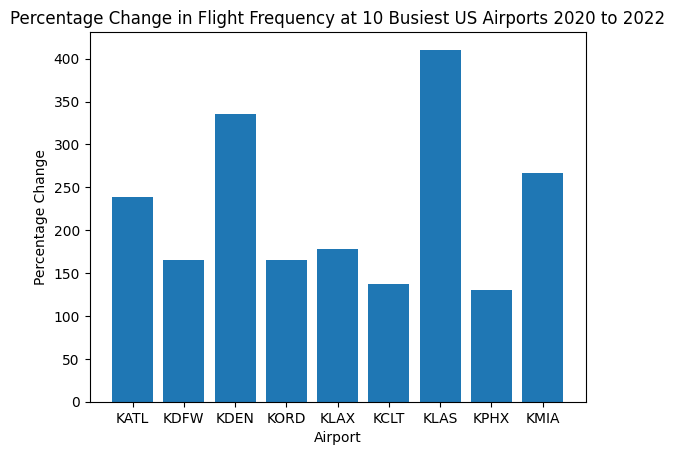

In [43]:
import matplotlib.pyplot as plt
plt.bar(change_dict.keys(), change_dict.values())
plt.xlabel('Airport')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Flight Frequency at 10 Busiest US Airports 2020 to 2022')
plt.show()